In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Cocacola=pd.read_csv("D:\\ExcelR Assignments\\Forecasting\\CocaCola_Sales_Rawdata.csv")
Cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<AxesSubplot:>

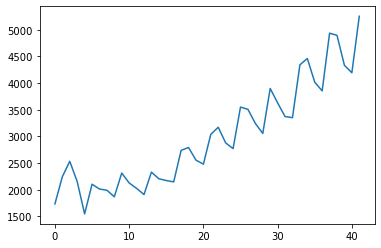

In [3]:
Cocacola.Sales.plot()

In [4]:
Cocacola['Quarters']=0
Cocacola['Year']=0
for i in range(42):
    p=Cocacola["Quarter"][i]
    Cocacola["Quarters"][i]=p[0:2]
    Cocacola["Year"][i]=p[3:5]
Cocacola.head()

<ipython-input-4-0bb6c8044b4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cocacola["Quarters"][i]=p[0:2]
C:\Users\shefs\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-4-0bb6c8044b4a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cocacola["Year"][i]=p[3:5]


,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [5]:
quartdummies=pd.DataFrame(pd.get_dummies(Cocacola.Quarters))
quartdummies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [6]:
Cocacola=pd.concat([Cocacola,quartdummies],axis=1)
Cocacola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [7]:
Cocacola['t']=range(1,43)
Cocacola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5


In [8]:
Cocacola['t_sqrd']=Cocacola.t*Cocacola.t
Cocacola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_sqrd
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25


In [9]:
Cocacola['log_Sales']=np.log(Cocacola.Sales)
Cocacola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_sqrd,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

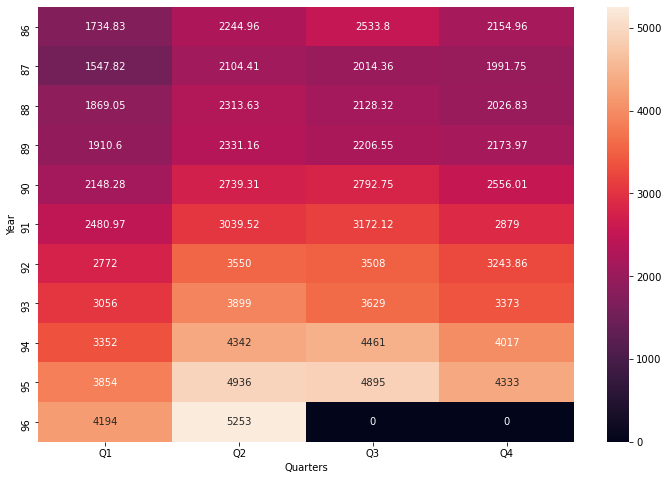

In [10]:
plt.figure(figsize=(12,8))
heatmap_y_quarter=pd.pivot_table(data=Cocacola,values='Sales',index='Year',columns='Quarters',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y_quarter,annot=True,fmt='g')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

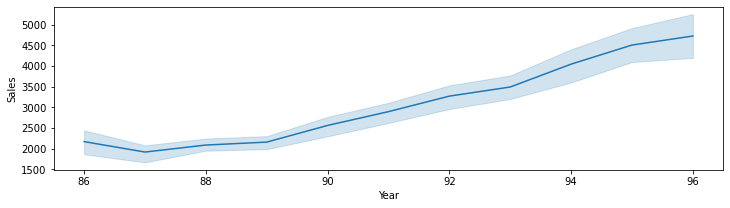

In [11]:
plt.figure(figsize=(12,3))
sns.lineplot(x='Year',y='Sales',data=Cocacola)

In [12]:
Train=Cocacola.head(30)
Test=Cocacola.tail(12)

In [13]:
Test

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_sqrd,log_Sales
30,Q3_93,3629.0,Q3,93,0,0,1,0,31,961,8.196712
31,Q4_93,3373.0,Q4,93,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,Q1,94,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,94,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,94,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,94,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,95,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,95,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,95,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,95,0,0,0,1,40,1600,8.374015


In [14]:
#Linear model

In [15]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

714.014448381834

In [16]:
#Exponential

In [17]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

552.2821039688286

In [18]:
#Quadratic

In [19]:
Quad = smf.ols('Sales~t+t_sqrd',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqrd"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

646.2715428656043

In [20]:
#Additive Seasonality

In [22]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467724

In [23]:
#Additive Seasonality Quadratic 

In [24]:
add_sea_Quad = smf.ols('Sales~t+t_sqrd+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_sqrd']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

586.0533068427393

In [25]:
#Multiplicative Seasonality

In [26]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1828.9238911891853

In [27]:
#Multiplicative Additive Seasonality 

In [28]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

410.2497060537806

In [29]:
#Comparison of results

In [34]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,410.249706
1,rmse_Exp,552.282104
4,rmse_add_sea_quad,586.053307
2,rmse_Quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,1828.923891


Multiplicative Additive Seasonality model is the best model